# Taller 1

**Por:** Juan Pablo Gaviria Salazar

## Calentamiento

In [1]:
# Importacion de librerias
import pandas as pd
import numpy as np
from scipy.stats import mode
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sb
from sklearn import tree
from sklearn import model_selection
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn import svm

In [2]:
# Definicion del conjunto de datos
data = pd.read_csv('data_calentamiento.csv', names=['x1','x2','y'])
data

,x1,x2,y
0,0.8,0.8,1
1,0.8,1.2,1
2,3.8,2.8,2
3,4.2,3.2,2
4,1.0,1.0,1
5,1.2,1.2,1
6,4.2,2.8,2
7,4.4,2.8,2
8,3.5,1.0,3
9,4.0,1.0,3


In [3]:
# Definicion de la funcion clasificadora
# Se realiza la clasificacion con distancia euclidea
def kClasificador(data,k,x1,x2):
    distanciaX1 = np.power(x1-data.x1.values,2)
    distanciaX2 = np.power(x2-data.x2.values,2)
    distanciaEuc = np.sqrt(distanciaX2+distanciaX1)
    minKElements = np.argpartition(distanciaEuc, k)
    minKElements = minKElements[:k]
    yValues = data.y.values[minKElements]
    return mode(yValues).mode

### Precisión del conjunto de entrenamiento

In [4]:
# Evaluacion del conjunto de entrenamiento
evaluacion = []
aciertos = 0
k = 2
for i in range(data.x1.size):
    resultado = kClasificador(data, k, data.x1.values[i], data.x2.values[i])
    evaluacion.append(resultado)
    if(data.y.values[i] == resultado):
        aciertos += 1
error = 1 - (aciertos/data.y.size)
print('Error en el conjunto de entrenamiento: {0:.1%}'.format(error))

Error en el conjunto de entrenamiento: 0.0%


### Precision de un punto

In [5]:
# Evaluacion del punto P=(3.0,2.0)
evaluacion = kClasificador(data, k, 3, 2)
print('La clasificacion de la observación (3.0, 2,0) es ' + str(evaluacion))

La clasificacion de la observación (3.0, 2,0) es [2]


Este punto con k=2 saca error, debido a que se presenta empate

### Valor de k con mayor precisión

In [6]:
# Se evalua el conjunto de entrenamiento con diferentes k
ks = [1, 2, 3, 4, 5, 6]
precisiones = []
for k in ks:
    aciertos = 0
    for i in range(data.x1.size):
        resultado = kClasificador(data, k, data.x1.values[i], data.x2.values[i])
        if(data.y.values[i] == resultado):
            aciertos += 1
    precisiones.append(1-(aciertos/data.y.size))
precisiones = ['{0:.1%}'.format(prec) for prec in precisiones]
tablaEvaluacion = pd.DataFrame({"k":ks,"Error":precisiones})
tablaEvaluacion


,k,Error
0,1,0.0%
1,2,0.0%
2,3,0.0%
3,4,0.0%
4,5,0.0%
5,6,0.0%


### Distancias ponderadas

In [7]:
# Se crea metodo de knn con distancias ponderadas
def kClasificadorPonderado(data,k,x1,x2):
    distanciaX1 = np.power(x1-data.x1.values,2)
    distanciaX2 = np.power(x2-data.x2.values,2)
    distanciaEuc = np.sqrt(distanciaX2+distanciaX1)
    minKElements = np.argpartition(distanciaEuc,k)
    minKElements = minKElements[:k]
    dk = minKElements[k-1]
    d1 = minKElements[0]
    if(distanciaEuc[dk] == distanciaEuc[d1]):
        yValues = data.y.values[minKElements]
        result = mode(yValues).mode[0]
    else:
        w = {}
        for element in minKElements:
            weight = (distanciaEuc[dk]-distanciaEuc[element])/(distanciaEuc[dk]-distanciaEuc[d1])
            yvalue = data.y.values[element]
            w[yvalue] = w.get(yvalue,0)+weight
        result = max(w, key=w.get)
    return result

In [8]:
k=5
x1=3
x2=2
result = kClasificadorPonderado(data,k,x1,x2)
print('Y resultado: '+str(result))

Y resultado: 3


## 3 Implementación KNN

### Evaluación con los datos de entrenamiento

In [9]:
# Instanciacion del modelo
k = 2
knn = KNeighborsClassifier(k)
x_train = pd.DataFrame({"x1":data.x1, "x2":data.x2})
knn.fit(x_train,data.y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [10]:
# Evaluacion con el conjunto de entrenamiento
print('Precisión sobre el conjunto de entrenamiento: {0:.1%}'
     .format(knn.score(x_train, data.y)))

Precisión sobre el conjunto de entrenamiento: 100.0%


### Evaluación con Datos Fisher

In [11]:
# Lectura de información
datos = pd.read_csv('datos.txt')
datos.head()

,genero,estatura,peso,long_pie,long_brazo,ancho_espalda,diam_craneo,long_rod_tob
0,0,159,49,36.0,68.0,42.0,57.0,40.0
1,1,164,62,39.0,73.0,44.0,55.0,44.0
2,0,172,65,38.0,75.0,48.0,58.0,44.0
3,0,167,52,37.0,73.0,41.5,58.0,44.0
4,0,164,51,36.0,71.0,44.5,54.0,40.0


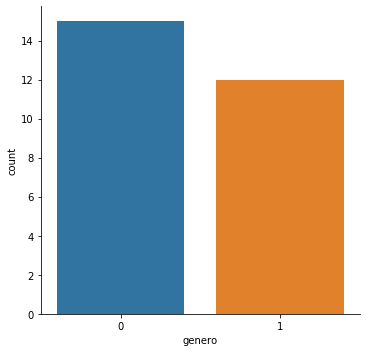

In [12]:
# Descripción de los datos
sb.factorplot('genero',data=datos,kind='count')

In [13]:
# Se crea las variables de entrenamiento
x_test = datos.drop('genero', axis=1)
y_test = datos.genero

In [14]:
# Se evalua el conjunto de entrenamiento con diferentes k
ks = [1, 2, 3, 4, 5, 6, 7, 8]
precisiones = []
for k in ks:
    knn = KNeighborsClassifier(k)
    knn.fit(x_test, y_test)
    precisiones.append(knn.score(x_test, y_test))
indMax = precisiones.index(max(precisiones))
precisiones = ['{0:.1%}'.format(prec) for prec in precisiones]
tablaEvaluacion = pd.DataFrame({"k":ks,"Precisión":precisiones})
tablaEvaluacion

,k,Precisión
0,1,100.0%
1,2,92.6%
2,3,88.9%
3,4,88.9%
4,5,92.6%
5,6,92.6%
6,7,92.6%
7,8,92.6%


In [15]:
print('El k con mayor precisión sobre el conjunto de entrenamiento es k={:d} con precisión del {:s}'
    .format(tablaEvaluacion['k'].values[indMax], tablaEvaluacion['Precisión'].values[indMax]))

El k con mayor precisión sobre el conjunto de entrenamiento es k=1 con precisión del 100.0%


## 4. Implementación Arbol de decisión

In [16]:
# Se crea el arbol de descisión
decision_tree = tree.DecisionTreeClassifier()
x = datos.drop('genero', axis=1)
y = datos.genero

Se itera con el tamaño del conjunto de test, iniciando con un test del 95% y rebajando en un 1% hasta llegar a un overfitting de colocar todo el conjunto de datos como entrenamiento

In [17]:
testSize = 0.95
resumenAcc = pd.DataFrame(columns=['Size of trainig Set', 'Train Accuracy', 'Test Accuracy'])
while(testSize > 0):
    # Se divide el conjunto de entrenamiento y de test
    x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = testSize)
    
    # Entrenamiento del arbol de decisión
    decision_tree.fit(x_train, y_train)
    
    # Precisión en el conjunto de entrenamiento y de test
    trainAcc = round(decision_tree.score(x_train, y_train)*100,2)
    testAcc = round(decision_tree.score(x_test, y_test)*100,2)
    resumenAcc.loc[len(resumenAcc)] = [(1-testSize)*100,trainAcc, testAcc]

    testSize = testSize-0.01

In [18]:
resumenAcc

,Size of trainig Set,Train Accuracy,Test Accuracy
0,5.0,100.0,53.85
1,6.0,100.0,42.31
2,7.0,100.0,42.31
3,8.0,100.0,40.00
4,9.0,100.0,52.00
...,...,...,...
90,95.0,100.0,50.00
91,96.0,100.0,50.00
92,97.0,100.0,100.00
93,98.0,100.0,100.00


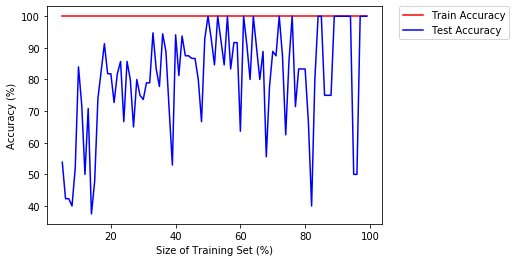

In [19]:
plt.plot(resumenAcc['Size of trainig Set'],resumenAcc['Train Accuracy'], 'r-', label='Train Accuracy')
plt.plot(resumenAcc['Size of trainig Set'], resumenAcc['Test Accuracy'], 'b-', label='Test Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Size of Training Set (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Como se puede ver en la gráfica, no hay un patron claro en el que se pueda predecir el comportamiento de un Set de entrenamiento mayor o menor.

## 5. Descripción de datos multivariantes

In [20]:
## Lectura de datos
data = pd.read_excel('ELE.xlsx')
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X16,X17,X18,X19,X20,X21,X22,X23,X24,Y
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,24,2,30,5,3,4,4,3,20,...,0,0,1,0,0,1,0,0,1,2
496,2,36,2,90,2,2,3,1,4,29,...,0,0,0,1,1,0,0,0,0,2
497,4,24,4,16,1,4,3,3,2,40,...,0,0,1,0,0,1,0,0,1,1
498,2,18,2,13,1,5,4,2,1,32,...,0,0,0,0,0,1,0,1,0,1


### Tipos de variables

Para cada variable X se realiza una identificación del tipo de variable y se grafica su distribución

#### X1

Es una variable discreta con rango {1, 2, 3, 4} en la muestra

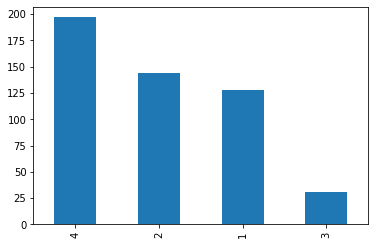

In [21]:
data.X1.value_counts().plot.bar()

#### X2

Es una variable discreta con valores entre 4 y 60 en la muestra

Minimo: 4
Maximo: 60


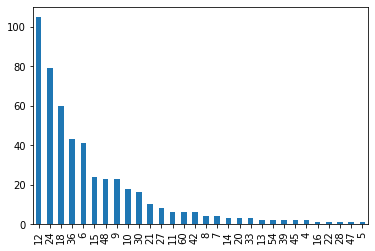

In [22]:
print('Minimo: ' + str(data.X2.min()))
print('Maximo: ' + str(data.X2.max()))
data.X2.value_counts().plot.bar()

#### X3

Variable discreta, con rango {0, 1, 2, 3, 4} en la muestra

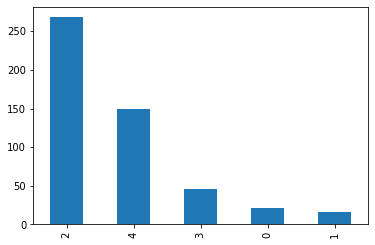

In [23]:
data.X3.value_counts().plot.bar()

#### X4

Variable discrieta, con valores entre 4 y 60 en la muestra

Minimo: 4
Maximo: 60


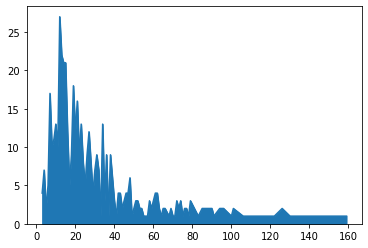

In [24]:
print('Minimo: ' + str(data.X2.min()))
print('Maximo: ' + str(data.X2.max()))
data.X4.value_counts().sort_index().plot.area()

#### X5

Variable discreta con rango {1, 2, 3, 4, 5} en la muestra

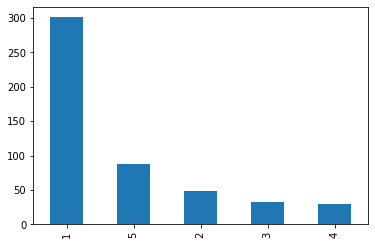

In [25]:
data.X5.value_counts().plot.bar()

#### X6

Variable discreta con rango {1, 2, 3, 4, 5} en la muestra

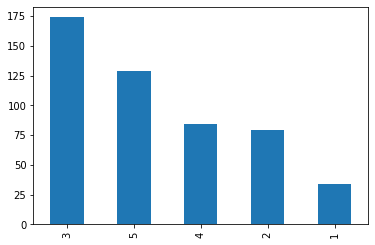

In [26]:
data.X6.value_counts().plot.bar()

#### X7

Variable discreta con rango {1, 2, 3, 4} en la muestra

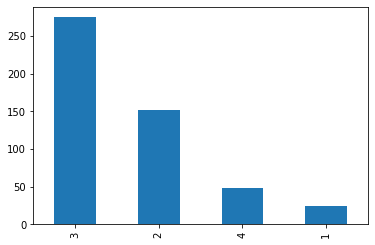

In [27]:
data.X7.value_counts().plot.bar()

#### X8

Variable discreta, con rango {1, 2, 3, 4} en la muestra

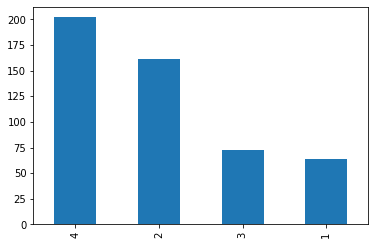

In [28]:
data.X8.value_counts().plot.bar()

#### X9

Variable discreta, con rango {1, 2, 3, 4} en la muestra

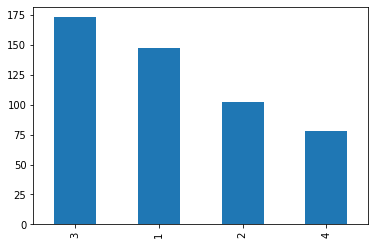

In [29]:
data.X9.value_counts().plot.bar()

#### X10

Variable discreta con rango entre 4 y 60 en la muestra

Minimo: 4
Maximo: 60


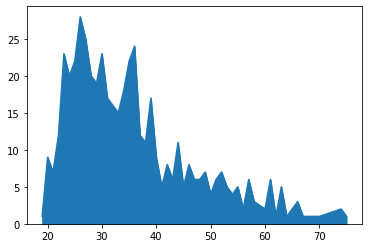

In [30]:
print('Minimo: ' + str(data.X2.min()))
print('Maximo: ' + str(data.X2.max()))
data.X10.value_counts().sort_index().plot.area()

#### X11

Es una variable discreta, con rango {1, 2, 3} en la muestra

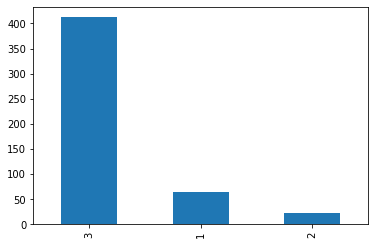

In [31]:
data.X11.value_counts().plot.bar()

#### X12

Es una variable discreta, con rango {1,2,3,4} en la muestra

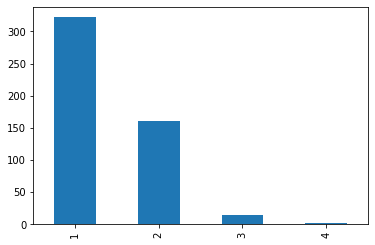

In [32]:
data.X12.value_counts().plot.bar()

#### X13

Es una variable discreta, con rango {1, 2} en la muestra

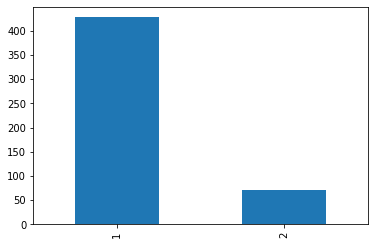

In [33]:
data.X13.value_counts().plot.bar()

#### X14

Es una variable discreta, con rango {1, 2} en la muestra

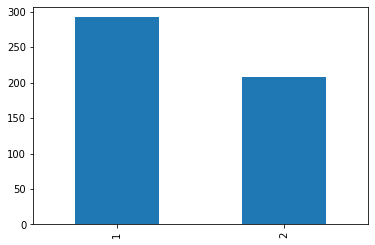

In [34]:
data.X14.value_counts().plot.bar()

#### X15

Es una variable discreta, con rango {1, 2} en la muestra

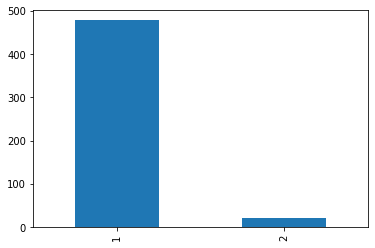

In [35]:
data.X15.value_counts().plot.bar()

#### X16

Es una variable discreta, con rango {0, 1} en la muestra

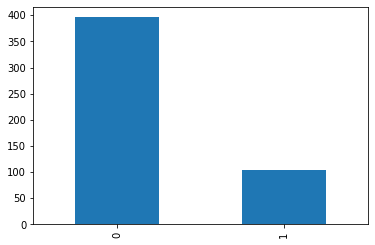

In [36]:
data.X16.value_counts().plot.bar()

#### X17

Es una variable discreta, con rango {0, 1} en la muestra

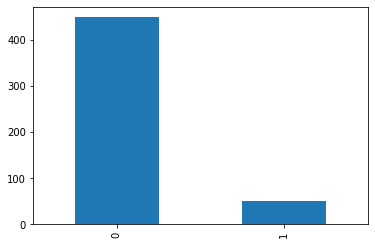

In [37]:
data.X17.value_counts().plot.bar()

#### X18

Es una variable discreta, con rango {0, 1} en la muestra

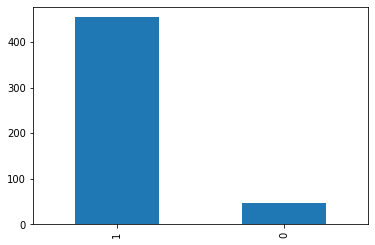

In [38]:
data.X18.value_counts().plot.bar()

#### X19

Es una variable discreta, con rango {0, 1} en la muestra

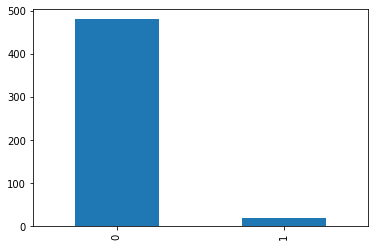

In [39]:
data.X19.value_counts().plot.bar()

#### X20

Es una variable discreta, con rango {0, 1} en la muestra

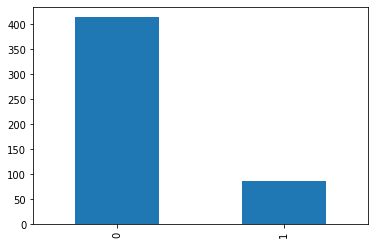

In [40]:
data.X20.value_counts().plot.bar()

### Medidas de centralización

In [41]:
def media(x):
    m = len(x)
    unos = np.ones([m,1])
    return (1/m)*x.T.dot(unos)

In [42]:
x = data.drop('Y', axis=1)
medias = media(x)

print('Vector de Medias:')
medias.T

Vector de Medias:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,2.594,20.308,2.572,32.378,2.108,3.39,2.692,2.826,2.364,35.528,...,1.044,0.208,0.102,0.908,0.04,0.172,0.724,0.022,0.192,0.622


### Matriz de varianzas y covarianzas

In [43]:
def covarianza(x):
    m = len(x)
    unos = np.ones([m,1])
    iden = np.identity(m)
    p = iden - (1/m)*unos.dot(unos.T)
    return (1/m)*x.T.dot(p).dot(x)

In [44]:
print('Covarianza de X')
covarianza(x)

Covarianza de X


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
X1,1.541164,-1.436952,0.208232,-2.996532,0.341848,0.13434,-0.003048,-0.068644,-0.118216,0.136368,...,0.001864,-0.015552,0.011412,0.048648,-0.01376,-0.028168,0.075944,-0.013068,0.003952,0.032532
X2,-1.436952,146.453136,-1.152176,208.933576,0.432736,0.23788,-0.213136,0.607592,3.219888,-4.362624,...,-0.419552,-0.426064,0.488584,-0.071664,0.11168,-0.248976,-0.388992,-0.042776,-0.497136,-0.065576
X3,0.208232,-1.152176,1.156816,-2.240216,0.074224,0.12092,-0.033824,0.085528,-0.074208,2.063984,...,-0.001168,0.025024,0.017656,0.002624,0.00712,-0.040384,0.043872,-0.002584,0.006176,-0.017784
X4,-2.996532,208.933576,-2.240216,796.119116,0.735176,-2.53342,-1.247576,0.669772,9.732408,7.298416,...,-0.436632,-0.502624,2.029444,-0.303224,0.66488,0.184984,-2.355672,-0.002316,-1.030576,-2.109116
X5,0.341848,0.432736,0.074224,0.735176,2.472336,0.26588,0.005264,0.124792,-0.077312,1.254976,...,0.021248,-0.006464,0.022984,0.023936,0.00568,0.029424,0.001808,0.005624,0.017264,0.016824
X6,0.134340,0.237880,0.120920,-2.533420,0.265880,1.47790,0.026120,0.303860,0.108040,3.704080,...,-0.007160,0.004880,0.012220,0.009880,-0.00760,-0.029080,-0.002360,-0.048580,0.015120,0.051420
X7,-0.003048,-0.213136,-0.033824,-1.247576,0.005264,0.02612,0.505136,0.004408,-0.043888,0.022624,...,0.011552,0.006064,0.009416,-0.008336,-0.00168,-0.021024,0.016992,-0.001224,0.003136,0.013576
X8,-0.068644,0.607592,0.085528,0.669772,0.124792,0.30386,0.004408,1.207724,0.171336,4.119872,...,-0.014344,0.002192,0.021748,-0.002008,0.00296,0.059928,-0.146024,-0.000172,-0.004592,-0.009772
X9,-0.118216,3.219888,-0.074208,9.732408,-0.077312,0.10804,-0.043888,0.171336,1.131504,1.213808,...,-0.028016,-0.009712,0.072872,0.035488,0.00144,-0.008608,-0.155536,0.003992,-0.081888,-0.030408
X10,0.136368,-4.362624,2.063984,7.298416,1.254976,3.70408,0.022624,4.119872,1.213808,131.325216,...,0.006768,0.390176,0.128144,0.006576,-0.00112,-0.878816,-0.286272,0.076384,0.388624,-1.094416


In [45]:
def covarianzaCorregida(x):
    m = len(x)
    n = len(x.T)
    unos = np.ones([m,1])
    xCentrado = x-unos.dot(media(x).T)
    return (1/(m-1))*xCentrado.T.dot(xCentrado)

In [46]:
print('Matriz de covarianza corregida:')
covarianzaCorregida(x)

Matriz de covarianza corregida:


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
X1,1.544253,-1.439832,0.208649,-3.002537,0.342533,0.134609,-0.003054,-0.068782,-0.118453,0.136641,...,0.001868,-0.015583,0.011435,0.048745,-0.013788,-0.028224,0.076096,-0.013094,0.003960,0.032597
X2,-1.439832,146.746629,-1.154485,209.352281,0.433603,0.238357,-0.213563,0.608810,3.226341,-4.371367,...,-0.420393,-0.426918,0.489563,-0.071808,0.111904,-0.249475,-0.389772,-0.042862,-0.498132,-0.065707
X3,0.208649,-1.154485,1.159134,-2.244705,0.074373,0.121162,-0.033892,0.085699,-0.074357,2.068120,...,-0.001170,0.025074,0.017691,0.002629,0.007134,-0.040465,0.043960,-0.002589,0.006188,-0.017820
X4,-3.002537,209.352281,-2.244705,797.714545,0.736649,-2.538497,-1.250076,0.671114,9.751912,7.313042,...,-0.437507,-0.503631,2.033511,-0.303832,0.666212,0.185355,-2.360393,-0.002321,-1.032641,-2.113343
X5,0.342533,0.433603,0.074373,0.736649,2.477291,0.266413,0.005275,0.125042,-0.077467,1.257491,...,0.021291,-0.006477,0.023030,0.023984,0.005691,0.029483,0.001812,0.005635,0.017299,0.016858
X6,0.134609,0.238357,0.121162,-2.538497,0.266413,1.480862,0.026172,0.304469,0.108257,3.711503,...,-0.007174,0.004890,0.012244,0.009900,-0.007615,-0.029138,-0.002365,-0.048677,0.015150,0.051523
X7,-0.003054,-0.213563,-0.033892,-1.250076,0.005275,0.026172,0.506148,0.004417,-0.043976,0.022669,...,0.011575,0.006076,0.009435,-0.008353,-0.001683,-0.021066,0.017026,-0.001226,0.003142,0.013603
X8,-0.068782,0.608810,0.085699,0.671114,0.125042,0.304469,0.004417,1.210144,0.171679,4.128128,...,-0.014373,0.002196,0.021792,-0.002012,0.002966,0.060048,-0.146317,-0.000172,-0.004601,-0.009792
X9,-0.118453,3.226341,-0.074357,9.751912,-0.077467,0.108257,-0.043976,0.171679,1.133772,1.216240,...,-0.028072,-0.009731,0.073018,0.035559,0.001443,-0.008625,-0.155848,0.004000,-0.082052,-0.030469
X10,0.136641,-4.371367,2.068120,7.313042,1.257491,3.711503,0.022669,4.128128,1.216240,131.588393,...,0.006782,0.390958,0.128401,0.006589,-0.001122,-0.880577,-0.286846,0.076537,0.389403,-1.096609


### Variabilidad total y varianza promedio

In [47]:
def variabilidadTotal(x):
    return np.trace(covarianza(x))

In [48]:
print('Variabilidad total: '+str(variabilidadTotal(x)))

Variabilidad total: 1085.7257240000013


In [49]:
def varianzaPromedio(x):
    return np.trace(covarianza(x))/len(x.T)

In [50]:
print('Varianza promedio: '+str(varianzaPromedio(x)))

Varianza promedio: 45.23857183333339


### Varianza generalizada y variabilidad promedio

In [51]:
def varianzaGeneralizada(x):
    return np.linalg.det(covarianza(x))

In [52]:
print('Varianza generalizada: '+str(varianzaGeneralizada(x)))

Varianza generalizada: 9.968903572843785e-08


In [53]:
def variabilidadPromedio(x):
    return varianzaGeneralizada(x)**(1/len(x.T))

In [54]:
print('Variabilidad promedio: '+str(variabilidadPromedio(x)))

Variabilidad promedio: 0.5108306824876419


### Distancia de Mahalanobis

Se hayan las distancias de cada punto al vector de medias

In [55]:
def distanciaMahal(x):
    vectormed = media(x).T
    distancias = pd.DataFrame(columns=['Distancia'])
    invcov = np.linalg.inv(covarianza(x))
    for index,row in x.iterrows():
        distancias.loc[index] = math.sqrt((row - vectormed).dot((invcov.dot((row - vectormed).T))).values[0][0])
    return distancias

In [56]:
print('Distancias:')
distanciaMahal(x)

Distancias:


,Distancia
0,4.792281
1,3.738912
2,4.483663
3,6.508128
4,5.040302
...,...
495,4.272053
496,6.656215
497,2.668710
498,5.604695


## 6 Análisis de dependencias lineales

In [57]:
## Lectura de datos
data = pd.read_excel('ELE.xlsx')
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X16,X17,X18,X19,X20,X21,X22,X23,X24,Y
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,24,2,30,5,3,4,4,3,20,...,0,0,1,0,0,1,0,0,1,2
496,2,36,2,90,2,2,3,1,4,29,...,0,0,0,1,1,0,0,0,0,2
497,4,24,4,16,1,4,3,3,2,40,...,0,0,1,0,0,1,0,0,1,1
498,2,18,2,13,1,5,4,2,1,32,...,0,0,0,0,0,1,0,1,0,1


### Correlación entre pares de variables

In [58]:
x = data.drop(columns=['Y'])
x

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
0,1,6,4,12,5,5,3,4,1,67,...,1,0,0,1,0,0,1,0,0,1
1,2,48,2,60,1,3,2,2,1,22,...,1,0,0,1,0,0,1,0,0,1
2,4,12,4,21,1,4,3,3,1,49,...,1,0,0,1,0,0,1,0,1,0
3,1,42,2,79,1,4,3,4,2,45,...,1,0,0,0,0,0,0,0,0,1
4,1,24,3,49,1,3,3,4,4,53,...,1,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,24,2,30,5,3,4,4,3,20,...,1,0,0,1,0,0,1,0,0,1
496,2,36,2,90,2,2,3,1,4,29,...,1,0,0,0,1,1,0,0,0,0
497,4,24,4,16,1,4,3,3,2,40,...,1,0,0,1,0,0,1,0,0,1
498,2,18,2,13,1,5,4,2,1,32,...,1,0,0,0,0,0,1,0,1,0


In [59]:
correlaciones = x.corr()
pd.set_option('display.max_columns', None)
display(correlaciones.round(2))
pd.reset_option('display.max_columns')

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
X1,1.00,-0.10,0.16,-0.09,0.18,0.09,-0.00,-0.05,-0.09,0.01,0.02,0.08,-0.04,0.02,0.01,-0.03,0.03,0.14,-0.06,-0.06,0.14,-0.07,0.01,0.05
X2,-0.10,1.00,-0.09,0.61,0.02,0.02,-0.02,0.05,0.25,-0.03,-0.12,-0.03,-0.01,0.12,-0.17,-0.09,0.13,-0.02,0.05,-0.05,-0.07,-0.02,-0.10,-0.01
X3,0.16,-0.09,1.00,-0.07,0.04,0.09,-0.04,0.07,-0.06,0.17,0.11,0.45,0.01,0.03,-0.01,0.06,0.05,0.01,0.03,-0.10,0.09,-0.02,0.01,-0.03
X4,-0.09,0.61,-0.07,1.00,0.02,-0.07,-0.06,0.02,0.32,0.02,-0.12,0.02,0.02,0.28,-0.08,-0.04,0.24,-0.04,0.12,0.02,-0.19,-0.00,-0.09,-0.15
X5,0.18,0.02,0.04,0.02,1.00,0.14,0.00,0.07,-0.05,0.07,-0.05,-0.02,0.04,0.03,0.07,-0.01,0.05,0.05,0.02,0.05,0.00,0.02,0.03,0.02
X6,0.09,0.02,0.09,-0.07,0.14,1.00,0.03,0.23,0.08,0.27,-0.05,0.10,0.17,0.02,-0.03,0.01,0.03,0.03,-0.03,-0.06,-0.00,-0.27,0.03,0.09
X7,-0.00,-0.02,-0.04,-0.06,0.00,0.03,1.00,0.01,-0.06,0.00,-0.03,-0.03,0.08,-0.06,0.08,0.02,0.04,-0.04,-0.01,-0.08,0.05,-0.01,0.01,0.04
X8,-0.05,0.05,0.07,0.02,0.07,0.23,0.01,1.00,0.15,0.33,0.02,0.07,0.08,0.11,-0.06,0.00,0.07,-0.01,0.01,0.14,-0.30,-0.00,-0.01,-0.02
X9,-0.09,0.25,-0.06,0.32,-0.05,0.08,-0.06,0.15,1.00,0.10,-0.17,0.01,0.04,0.21,-0.13,-0.02,0.23,0.12,0.01,-0.02,-0.33,0.03,-0.20,-0.06
X10,0.01,-0.03,0.17,0.02,0.07,0.27,0.00,0.33,0.10,1.00,-0.04,0.15,0.11,0.18,0.00,0.08,0.04,0.00,-0.00,-0.20,-0.06,0.05,0.09,-0.20


Las variables con mayor correlación entre pares son la X21 con la X20, con un -0.74 de correlación

### Correlación multiple

Se calcula el vector de correlaciones multiples para encontrar la variable que más se explica con el resto de variables

In [60]:
covarianzas = x.cov()
matrizCorrMultiple = 1-(np.diag(np.linalg.inv(covarianzas))*np.diag(covarianzas))**-1
print(matrizCorrMultiple.round(2))

[0.11 0.42 0.27 0.5  0.09 0.24 0.04 0.23 0.37 0.32 0.09 0.24 0.11 0.23
 0.1  0.1  0.17 0.46 0.45 0.69 0.72 0.19 0.57 0.57]


La variable mejor explicada por las demas es la **X21**

Se buscan los betas de la variable X21 en base a todos los demas

In [61]:
yCorr = x.X21
xCorr = x.drop(columns=['X21'])
model = LinearRegression().fit(xCorr, yCorr)
print('Precisión del modelo: {0:.2%}'.format(model.score(xCorr,yCorr)))
print('Coeficientes del modelo:')
print(model.coef_.round(3))
print('Intercepto del modelo:')
print(model.intercept_.round(3))

Precisión del modelo: 71.86%
Coeficientes del modelo:
[ 0.015  0.     0.008 -0.001  0.011  0.005 -0.013 -0.041 -0.113 -0.006
  0.024 -0.008 -0.047  0.013  0.003 -0.017 -0.047 -0.003  0.019 -0.902
 -0.084  0.043  0.042]
Intercepto del modelo:
1.382


### Correlación entre pares independientes de variables

Se halla la matriz de correlaciones parciales

In [62]:
def correlacionesParciales(x):
    """
    funcion para calcular las correlaciones entre pares de variables
    """
    SdiaINV = np.diag(np.linalg.inv(x.cov()))**-0.5 #son las varianzas poblacionales
    matriz_D = np.diag(SdiaINV,0) #matriz cuadrada diagonal cuya diagonal es Sdia
    intermedio = matriz_D.dot(np.linalg.inv(x.cov()))
    CorrelP = -1*intermedio.dot(matriz_D)
    return CorrelP

In [63]:
corrParciales = pd.DataFrame(correlacionesParciales(x), index=x.columns, columns=x.columns)
corrParciales.round(2)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24
X1,-1.00,-0.06,0.10,-0.01,0.15,0.05,0.00,-0.04,-0.03,-0.00,...,-0.00,-0.03,0.04,0.12,0.04,0.03,0.08,-0.04,0.03,0.03
X2,-0.06,-1.00,-0.02,0.58,0.03,0.07,0.01,0.06,0.05,-0.07,...,-0.13,-0.04,-0.02,-0.02,-0.03,-0.06,0.01,0.02,0.01,0.05
X3,0.10,-0.02,-1.00,-0.05,0.04,0.01,-0.05,0.04,-0.04,0.08,...,-0.01,0.06,0.10,0.01,0.05,-0.03,0.03,-0.04,-0.02,-0.05
X4,-0.01,0.58,-0.05,-1.00,0.03,-0.12,-0.04,-0.07,0.10,0.00,...,0.06,0.01,0.13,0.01,0.09,-0.03,-0.08,-0.09,-0.07,-0.15
X5,0.15,0.03,0.04,0.03,-1.00,0.12,-0.00,0.05,-0.04,0.05,...,0.07,-0.02,0.04,0.08,0.07,0.09,0.07,0.09,0.05,0.07
X6,0.05,0.07,0.01,-0.12,0.12,-1.00,0.01,0.13,0.09,0.21,...,-0.02,0.01,0.03,0.01,0.01,0.00,0.02,-0.26,0.06,0.10
X7,0.00,0.01,-0.05,-0.04,-0.00,0.01,-1.00,0.02,-0.06,-0.02,...,0.07,0.02,0.08,-0.04,-0.02,-0.08,-0.04,0.00,0.01,0.04
X8,-0.04,0.06,0.04,-0.07,0.05,0.13,0.02,-1.00,0.03,0.25,...,-0.06,-0.01,-0.00,-0.02,-0.00,0.01,-0.17,0.02,0.02,0.05
X9,-0.03,0.05,-0.04,0.10,-0.04,0.09,-0.06,0.03,-1.00,-0.07,...,-0.05,0.01,0.11,0.13,0.08,-0.33,-0.40,-0.02,-0.16,-0.09
X10,-0.00,-0.07,0.08,0.00,0.05,0.21,-0.02,0.25,-0.07,-1.00,...,0.03,0.03,-0.01,-0.02,-0.01,-0.32,-0.23,0.05,0.02,-0.11


### Conclusión

Se identifica que la correlación de la variable X20 con la X21, incluso en la correlación parcial entre pares es la más alta del modelo. La variable X21, por ser la que es mejor explicada en base al resto, es la mejor candidata para ser eliminada

## 7. Problema de clasificación

Para la implementación de un clasificador, se utiliza support vector machine. En un primer lugar se realiza entrenamiento con todo el conjunto de variables y se evalua los resultados frente al set de entrenamiento y el de prueba. Luego se implementa eliminando del modelo la variable X21 y se calcula la precisión de los resultados

In [64]:
## Lectura de datos
data = pd.read_excel('ELE.xlsx')
data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X16,X17,X18,X19,X20,X21,X22,X23,X24,Y
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,24,2,30,5,3,4,4,3,20,...,0,0,1,0,0,1,0,0,1,2
496,2,36,2,90,2,2,3,1,4,29,...,0,0,0,1,1,0,0,0,0,2
497,4,24,4,16,1,4,3,3,2,40,...,0,0,1,0,0,1,0,0,1,1
498,2,18,2,13,1,5,4,2,1,32,...,0,0,0,0,0,1,0,1,0,1


In [65]:
# Se separan las caracteristicas de la prediccion
x = data.drop(columns=['Y'])
y = data.Y

In [66]:
# Se divide el conjunto de datos en entrenamiento y test, usando un 0.6 para entrenamiento
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size = 0.4)

### Clasificador con conjunto original de variables

In [67]:
# Entrenamiento del modelo
clasificador = svm.SVC().fit(x_train, y_train)

In [68]:
# Precisiones
print('Precisión del conjunto de entrenamiento: {0:.2%}'.format(clasificador.score(x_train,y_train)))
print('Precisión del conjunto de test: {0:.2%}'.format(clasificador.score(x_test,y_test)))

Precisión del conjunto de entrenamiento: 73.00%
Precisión del conjunto de test: 76.00%


### Clasificador al eliminar la variable X21

Se elimina la variable X21 del conjunto de entrenamiento y de test, con el fin de que ambos modelos sean entrenados con los mismos conjuntos de datos y la diferencia sea únicamente la eliminación de la variable

In [69]:
# Eliminacion de la variable x21
x_trainOpt = x_train.drop(columns='X21')
x_testOpt = x_test.drop(columns='X21')

In [70]:
# Entrenamiento del modelo
clasificadorOpt = svm.SVC().fit(x_trainOpt, y_train)

In [71]:
# Precisiones
print('Precisión del conjunto de entrenamiento: {0:.2%}'.format(clasificadorOpt.score(x_trainOpt,y_train)))
print('Precisión del conjunto de test: {0:.2%}'.format(clasificadorOpt.score(x_testOpt,y_test)))

Precisión del conjunto de entrenamiento: 73.00%
Precisión del conjunto de test: 76.00%


### Conclusión

La precisión del modelo es la misma este o no la variable X21, lo que da a indicar que esta no es representativa para el modelo